In [189]:
# Libraries
import numpy as np 
import matplotlib.pyplot as plt

Newton's law of Gravity:
$$\vec{F} = - G\frac{m_1m_2}{|\vec{r}|^2}\hat{r}$$
where:$$\vec{r} = \vec{r}_1 - \vec{r}_2$$ $$\hat{r} = \frac{\vec{r}}{|\vec{r}|}$$

In [333]:
# Data: 
AU = 1.5e11
earth_mass = 5.972e24
sun_mass = 2.0e30
daysec = 24.0*60*60  
earth_aphelion_velocity = 29290
earth_aphelion_momenta = earth_aphelion_velocity * earth_mass

In [334]:
# Creating a Class that will hold the information of the planetary system objects such as planets and stars
class SystObj:
    def __init__(self, mass = float, position = np.array, momentum = np.array):
        self.mass = mass
        self.position = position
        self.momentum = momentum

star = SystObj(sun_mass, np.array([0,0]), np.array([0,0]))
planet = SystObj(earth_mass, np.array([1.0167*AU,0]), np.array([0,earth_aphelion_momenta]))

In [335]:
def gravforce(obj1 = SystObj, obj2 = SystObj):
    '''Calculates the gravitational force between two objects.'''
    # The Gravitational constant:
    G = 6.67e-11 
    # Distance vector between the two objects
    dis_vec = obj1.position - obj2.position
    # Calculating the magnitude of the distance vector
    dis_mag = np.linalg.norm(dis_vec)
    # Calculating the unit distance vector:
    unit_vec = dis_vec/dis_mag
    # Calculating the force vector:
    force_vec = -G*(obj1.mass*obj2.mass/dis_mag**2)*unit_vec
    return force_vec

In [339]:
# The simulation
dt = 1*daysec
t = 0
star_position_history = [list(star.position)]
planet_position_history = [list(planet.position)]
while t<1*365*daysec:
    # Calculate the force between objects
    starforce = gravforce(star, planet)
    planetforce = gravforce(planet, star)
    # Update momentum:
    star.momentum = star.momentum + starforce*dt
    planet.momentum = planet.momentum + planetforce*dt
    # Update position
    star.position = star.position + (star.momentum/star.mass)*dt
    planet.position = planet.position + (planet.momentum/planet.mass)*dt
    # Record the position of the objects
    star_position_history.append(list(star.position))
    planet_position_history.append(list(planet.position))
    
    t +=dt

In [340]:
posx_planet = np.array(planet_position_history)[:,0]
posy_planet = np.array(planet_position_history)[:,1]
posx_sun = np.array(star_position_history)[:,0]
posy_sun = np.array(star_position_history)[:,1]

(-161739179854.77228,
 167467074470.79175,
 -165817148480.95605,
 163343825812.0419)

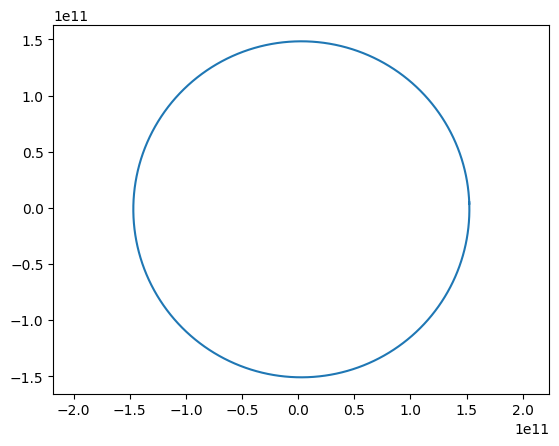

In [341]:
plt.plot(posx_planet, posy_planet)
plt.plot(posx_sun, posy_sun)
plt.axis('equal')